In [1]:
import numpy as np
import pandas as pd


# **Import and Combine appointments json and json on user column**

In [2]:
df1=pd.read_csv("appointments.csv")
df2=pd.read_csv("user.csv")
df1["user"]=[a for a in range(1,len(df1)+1)]

In [3]:
df3=pd.merge(df2,df1,how="outer")
df3=df3.iloc[:,1:]
df3.head()

,symptoms,activities,constants,user,age,gender,appointments
0,"[{'name': 'backache', 'date': 1530680440, 'str...","[{'activity': 'fishing', 'date': 1582084266, '...","[{'name': 'eat Omega-3', 'date': 1569335492}, ...",1,35,M,"[{u'date': 1557129130, u'doctor': u'Dr. Yen'},..."
1,"[{'name': 'backache', 'date': 1515771831, 'str...","[{'activity': 'meditation', 'date': 1531894948...","[{'name': 'Do knee exercises', 'date': 1549925...",2,69,M,"[{u'date': 1542408628, u'doctor': u'Dr. Jones'..."
2,"[{'name': 'fatigue', 'date': 1595694786, 'stre...","[{'activity': 'running', 'date': 1526578035, '...","[{'name': 'write journal entry', 'date': 15751...",3,40,M,"[{u'date': 1554590672, u'doctor': u'Dr. Salkio..."
3,"[{'name': 'high blood pressure', 'date': 15088...","[{'activity': 'running', 'date': 1570003333, '...","[{'name': 'Do knee exercises', 'date': 1553185...",4,51,F,"[{u'date': 1551717508, u'doctor': u'Dr. Salkio..."
4,"[{'name': 'muscle pain', 'date': 1582910637, '...","[{'activity': 'fishing', 'date': 1586464198, '...","[{'name': 'write journal entry', 'date': 15553...",5,25,M,"[{u'date': 1583643001, u'doctor': u'Dr. Sarias..."


In [4]:
df3.tail()

,symptoms,activities,constants,user,age,gender,appointments
994,"[{'name': 'backache', 'date': 1559599495, 'str...","[{'activity': 'soccer', 'date': 1579427259, 'b...","[{'name': 'write journal entry', 'date': 15585...",995,70,F,NaN
995,"[{'name': 'fatigue', 'date': 1490398316, 'stre...","[{'activity': 'yoga', 'date': 1525052298, 'bef...","[{'name': 'drink more water', 'date': 15729258...",996,35,M,NaN
996,"[{'name': 'high blood pressure', 'date': 15162...","[{'activity': 'running', 'date': 1511067809, '...","[{'name': 'Do knee exercises', 'date': 1548544...",997,76,F,NaN
997,"[{'name': 'cramps', 'date': 1588426628, 'stren...","[{'activity': 'yoga', 'date': 1482939160, 'bef...","[{'name': 'eat Omega-3', 'date': 1585511428}, ...",998,18,M,NaN
998,"[{'name': 'backache', 'date': 1510922943, 'str...","[{'activity': 'fishing', 'date': 1557524532, '...","[{'name': 'write journal entry', 'date': 15679...",999,45,M,NaN


# **Finding no of appoinntments for each user and adding this as a column to df1**

In [5]:
import yaml
def no_of_appointments(aan):
    no=[]
    for a in range(len(aan)):
        x=yaml.load(aan[a])
        dd=pd.DataFrame(x)
        no.append(len(dd))
    return no

In [6]:
no_of_appointments_for_each_user=no_of_appointments(df1["appointments"])

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [7]:
df1["no_of_appointments"]=no_of_appointments_for_each_user

In [8]:
df3=pd.merge(df2,df1,how="outer")
df3=df3.iloc[:,1:]
df3.head()

,symptoms,activities,constants,user,age,gender,appointments,no_of_appointments
0,"[{'name': 'backache', 'date': 1530680440, 'str...","[{'activity': 'fishing', 'date': 1582084266, '...","[{'name': 'eat Omega-3', 'date': 1569335492}, ...",1,35,M,"[{u'date': 1557129130, u'doctor': u'Dr. Yen'},...",21.0
1,"[{'name': 'backache', 'date': 1515771831, 'str...","[{'activity': 'meditation', 'date': 1531894948...","[{'name': 'Do knee exercises', 'date': 1549925...",2,69,M,"[{u'date': 1542408628, u'doctor': u'Dr. Jones'...",25.0
2,"[{'name': 'fatigue', 'date': 1595694786, 'stre...","[{'activity': 'running', 'date': 1526578035, '...","[{'name': 'write journal entry', 'date': 15751...",3,40,M,"[{u'date': 1554590672, u'doctor': u'Dr. Salkio...",26.0
3,"[{'name': 'high blood pressure', 'date': 15088...","[{'activity': 'running', 'date': 1570003333, '...","[{'name': 'Do knee exercises', 'date': 1553185...",4,51,F,"[{u'date': 1551717508, u'doctor': u'Dr. Salkio...",8.0
4,"[{'name': 'muscle pain', 'date': 1582910637, '...","[{'activity': 'fishing', 'date': 1586464198, '...","[{'name': 'write journal entry', 'date': 15553...",5,25,M,"[{u'date': 1583643001, u'doctor': u'Dr. Sarias...",18.0


# **Flattening the json Data**

In [6]:
def list_of_lists_of_dictionaries_to_df(aan):
    no=pd.DataFrame()
    for a in range(len(aan)):
        x=yaml.load(aan[a])
        dd=pd.DataFrame(x)
        if a==0:
            no=dd
            continue
        no=pd.concat([no,dd],axis=0)
    no.index=[a for a in range(len(no))]
    return no

In [38]:
appointments=list_of_lists_of_dictionaries_to_df(df1["appointments"])

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [13]:
appointments.head()

,u'date',u'doctor'
0,1557129130,u'Dr. Yen'
1,1531955472,u'Dr. Jones'
2,1560935950,u'Dr. Sarias'
3,1565733423,u'Dr. Jones'
4,1530069191,u'Dr. Yen'


In [39]:
time=pd.to_datetime(appointments["u'date'"],unit="s")

In [40]:
appointments["u'date'"]=time

In [41]:
appointments.head()

,u'date',u'doctor'
0,2019-05-06 07:52:10,u'Dr. Yen'
1,2018-07-18 23:11:12,u'Dr. Jones'
2,2019-06-19 09:19:10,u'Dr. Sarias'
3,2019-08-13 21:57:03,u'Dr. Jones'
4,2018-06-27 03:13:11,u'Dr. Yen'


In [42]:
appointments["u'doctor'"].value_counts()

u'Dr. Abdul'       3213
u'Dr. Sarias'      3089
u'Dr. Jones'       3082
u'Dr. Salkioff'    3040
u'Dr. Yen'         3036
Name: u'doctor', dtype: int64

In [15]:
import matplotlib.pyplot as plt

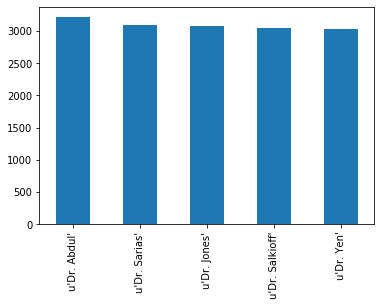

In [16]:
appointments["u'doctor'"].value_counts().plot(kind="bar")

In [17]:
symptom=list_of_lists_of_dictionaries_to_df(df2["symptoms"])

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [18]:
symptom.head()

,date,name,strength
0,1530680440,backache,1
1,1556070517,cramps,2
2,1510950324,backache,3
3,1577089119,backache,1
4,1575599213,fatigue,1


In [19]:
timestamp=pd.to_datetime(symptom["date"],unit="s")

In [20]:
timestamp

0       2018-07-04 05:00:40
1       2019-04-24 01:48:37
2       2017-11-17 20:25:24
3       2019-12-23 08:18:39
4       2019-12-06 02:26:53
5       2018-07-06 09:09:56
6       2018-04-26 07:03:09
7       2017-09-10 03:36:02
8       2018-09-08 15:02:14
9       2019-11-29 14:29:59
10      2019-06-06 09:56:41
11      2020-02-24 15:59:53
12      2017-03-17 10:09:45
13      2018-12-11 01:46:27
14      2019-10-31 03:01:31
15      2018-01-12 15:43:51
16      2020-04-19 05:47:25
17      2019-05-19 06:58:35
18      2018-12-12 22:47:07
19      2018-01-11 08:45:18
20      2020-01-13 00:20:24
21      2018-11-18 01:44:44
22      2017-06-07 07:03:36
23      2017-02-01 08:05:06
24      2018-09-29 12:52:03
25      2018-11-16 22:57:52
26      2019-03-12 10:40:24
27      2020-05-11 19:28:25
28      2017-01-29 21:18:17
29      2017-12-11 22:54:45
                ...        
13055   2018-08-01 13:24:43
13056   2019-03-07 18:28:52
13057   2018-12-22 02:33:25
13058   2018-02-02 23:28:17
13059   2018-02-09 0

In [27]:
symptom["date"]=timestamp

In [28]:
symptom.head()

,date,name,strength
0,2018-07-04 05:00:40,backache,1
1,2019-04-24 01:48:37,cramps,2
2,2017-11-17 20:25:24,backache,3
3,2019-12-23 08:18:39,backache,1
4,2019-12-06 02:26:53,fatigue,1


In [21]:
symptom_name=symptom["name"].value_counts()

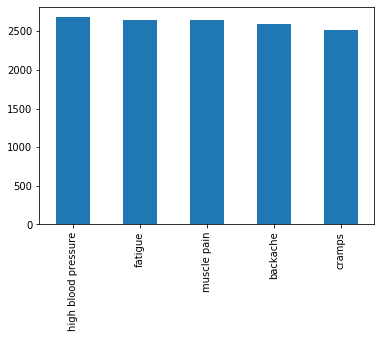

In [22]:
symptom_name.plot(kind="bar")

In [23]:
symptom_strength=symptom["strength"]

In [24]:
symptom_strength.mean()

3.011692777990065

In [25]:
symptom_strength.median()

3.0

# **3b)**

In [7]:
constant=list_of_lists_of_dictionaries_to_df(df3["constants"])

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [9]:
timestamp=pd.to_datetime(constant["date"],unit="s")

In [10]:
constant["date"]=timestamp

In [11]:
constant.head()

,date,name
0,2019-09-24 14:31:32,eat Omega-3
1,2019-02-25 21:23:23,write journal entry
2,2019-07-23 03:48:54,drink more water
3,2019-02-11 22:50:13,Do knee exercises
4,2019-11-30 11:35:02,write journal entry


In [29]:
symptom.head()

,date,name,strength
0,2018-07-04 05:00:40,backache,1
1,2019-04-24 01:48:37,cramps,2
2,2017-11-17 20:25:24,backache,3
3,2019-12-23 08:18:39,backache,1
4,2019-12-06 02:26:53,fatigue,1


In [43]:
appointments.head()

,u'date',u'doctor'
0,2019-05-06 07:52:10,u'Dr. Yen'
1,2018-07-18 23:11:12,u'Dr. Jones'
2,2019-06-19 09:19:10,u'Dr. Sarias'
3,2019-08-13 21:57:03,u'Dr. Jones'
4,2018-06-27 03:13:11,u'Dr. Yen'


In [96]:
t=pd.to_datetime("today")<constant["date"][0]
t
#t/np.timedelta64(1,"D")

False

In [93]:
def finding_constant_date_duration(aan):
    no=[]
    for a in range(len(aan)):
        x=yaml.load(aan[a])
        dd=pd.DataFrame(x)
        dd["date"]=pd.to_datetime(dd["date"],unit="s")
        for z in range(0,len(dd["date"])):
            date=np.nan
            if ((pd.to_datetime("today")-dd["date"][z])/np.timedelta64(1,"D")>365):
                date=dd["date"][z]
            elif z!=len(dd["date"])-1:
                continue
            else:
                date=np.nan
            if z==0:
                no.append(date)
                break
            no.append(date)
            break
  #  no.index=[a for a in range(len(no))]
    return no

999

In [130]:
def checking_more_than_1_symptoms_before_and_after_and_carrying_out_their_strength(aan,m):
    before=pd.DataFrame()
    after=pd.DataFrame()
    for a in range(len(aan)):
        x=yaml.load(aan[a])
        dd=pd.DataFrame(x)
        dd["date"]=pd.to_datetime(dd["date"],unit="s")
        try:
            ddd=dd[dd["date"]>m[a]]
            fff=dd[dd["date"]<m[a]]
        except:
            continue
        ddd=pd.DataFrame(ddd["name"].value_counts())
        fff=pd.DataFrame(fff["name"].value_counts())
        ddd=ddd[ddd>1]
        fff=fff[fff>1]
        ddd=pd.DataFrame(ddd)
        fff=pd.DataFrame(fff)
        if a==0:
            before=ddd
            after=fff
            continue
        before=pd.concat([before,ddd],axis=0)
        after=pd.concat([after,fff],axis=0)
    return before,after

In [92]:
constant_dates_one_year_before=finding_constant_date_duration(df3["constants"])

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [123]:
constant_dates_one_year_before

[Timestamp('2019-02-25 21:23:23'),
 Timestamp('2019-02-11 22:50:13'),
 nan,
 Timestamp('2019-03-21 16:16:46'),
 Timestamp('2019-04-15 16:02:59'),
 nan,
 nan,
 nan,
 Timestamp('2019-07-20 02:34:21'),
 Timestamp('2018-12-21 21:44:55'),
 nan,
 Timestamp('2019-01-09 14:02:24'),
 nan,
 nan,
 nan,
 Timestamp('2019-06-02 16:47:41'),
 nan,
 Timestamp('2019-06-26 05:52:18'),
 Timestamp('2019-07-10 00:26:22'),
 nan,
 nan,
 nan,
 Timestamp('2019-04-22 02:48:03'),
 Timestamp('2019-08-17 07:05:45'),
 Timestamp('2019-04-16 02:41:44'),
 Timestamp('2019-05-30 16:57:52'),
 nan,
 Timestamp('2018-12-28 03:03:38'),
 Timestamp('2019-02-24 14:29:59'),
 Timestamp('2019-08-12 13:16:05'),
 nan,
 nan,
 Timestamp('2019-02-20 21:02:02'),
 Timestamp('2019-04-01 22:22:26'),
 Timestamp('2019-08-07 06:40:01'),
 Timestamp('2019-05-24 23:26:07'),
 Timestamp('2019-06-13 15:08:26'),
 Timestamp('2019-08-15 01:53:25'),
 Timestamp('2019-02-22 00:08:09'),
 Timestamp('2019-04-07 04:00:19'),
 nan,
 Timestamp('2019-08-16 08:53:

In [149]:
before,after=checking_more_than_1_symptoms_before_and_after_and_carrying_out_their_strength(df3["symptoms"],constant_dates_one_year_before)

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [150]:
a,b=before,after

In [168]:
before,after=a,b

In [169]:
before.to_csv("Before.csv")
after.to_csv("After.csv")
before=pd.read_csv("Before.csv",usecols=[0,1])
before.columns=["Disease","Strength"]
after=pd.read_csv("After.csv",usecols=[0,1])
after.columns=["Disease","Strength"]

In [170]:
before=before.groupby(by="Disease")

In [171]:
before.sum()

,Strength
Disease,
backache,464.0
cramps,445.0
fatigue,487.0
high blood pressure,467.0
muscle pain,487.0


In [172]:
after=after.groupby(by="Disease")

In [173]:
after.sum()

,Strength
Disease,
backache,853.0
cramps,828.0
fatigue,917.0
high blood pressure,905.0
muscle pain,894.0


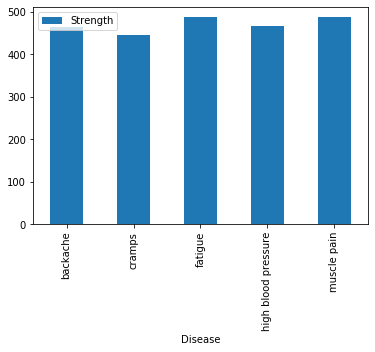

In [175]:
before.sum().plot(kind="bar")

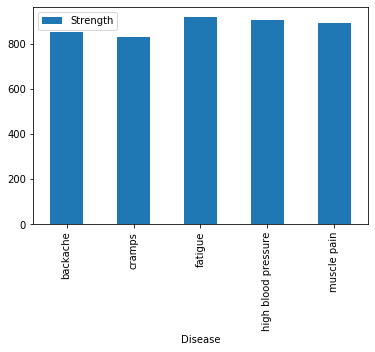

In [176]:
after.sum().plot(kind="bar")

# **The 10% of users whose symptom.strength is lowest, and identify what is different about them compared to the other 90 percent (ex: do they have lower age? more activities?)**

In [22]:
def mean_strength(aan):
    df9=[]
    for a in range(len(aan)):
        x=yaml.load(aan[a])
        dd=pd.DataFrame(x)
        df9.append(dd["strength"].mean())
    return df9
n=mean_strength(df3["symptoms"])
df3["mean_strength"]=n
df3.head()

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


,symptoms,activities,constants,user,age,gender,appointments,no_of_appointments,mean_strength
0,"[{'name': 'backache', 'date': 1530680440, 'str...","[{'activity': 'fishing', 'date': 1582084266, '...","[{'name': 'eat Omega-3', 'date': 1569335492}, ...",1,35,M,"[{u'date': 1557129130, u'doctor': u'Dr. Yen'},...",21.0,2.533333
1,"[{'name': 'backache', 'date': 1515771831, 'str...","[{'activity': 'meditation', 'date': 1531894948...","[{'name': 'Do knee exercises', 'date': 1549925...",2,69,M,"[{u'date': 1542408628, u'doctor': u'Dr. Jones'...",25.0,2.850000
2,"[{'name': 'fatigue', 'date': 1595694786, 'stre...","[{'activity': 'running', 'date': 1526578035, '...","[{'name': 'write journal entry', 'date': 15751...",3,40,M,"[{u'date': 1554590672, u'doctor': u'Dr. Salkio...",26.0,2.750000
3,"[{'name': 'high blood pressure', 'date': 15088...","[{'activity': 'running', 'date': 1570003333, '...","[{'name': 'Do knee exercises', 'date': 1553185...",4,51,F,"[{u'date': 1551717508, u'doctor': u'Dr. Salkio...",8.0,2.772727
4,"[{'name': 'muscle pain', 'date': 1582910637, '...","[{'activity': 'fishing', 'date': 1586464198, '...","[{'name': 'write journal entry', 'date': 15553...",5,25,M,"[{u'date': 1583643001, u'doctor': u'Dr. Sarias...",18.0,3.000000


In [23]:
m=no_of_appointments(df3["activities"])
df3["no_of_activities"]=m

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [24]:
_10_percent=df3.sort_values(by="mean_strength").head(100)
_10_percent["gender"].value_counts()

F    50
M    50
Name: gender, dtype: int64

In [25]:
var=_10_percent["age"].value_counts().sort_index()

In [26]:
var=pd.DataFrame(var)
vr=pd.DataFrame()
vr["age range"]=["15-30","31-50","50-80"]
vr["no_of_people"]=([var[0:13].sum()[0],var[13:28].sum()[0],var[28:].sum()[0]])

In [27]:
vr

,age range,no_of_people
0,15-30,24
1,31-50,29
2,50-80,47


In [28]:
per=_10_percent["no_of_activities"].value_counts().sort_index()

In [29]:
per=pd.DataFrame(per)
pre=pd.DataFrame()
pre["activities_range"]=["2-10","10-20","20-30"]
pre["no_of_activities"]=([per[0:9].sum()[0],per[9:19].sum()[0],per[19:].sum()[0]])

In [30]:
pre

,activities_range,no_of_activities
0,2-10,35
1,10-20,31
2,20-30,34


# **users that have >3 cases of a specific symptom**

In [31]:
no_of_symptoms=no_of_appointments(df3["symptoms"])#calculating the no of symptoms to a person with the same function from which no of appoinntmennts was calculated

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [32]:
df3["no_of_symptoms"]=no_of_symptoms

In [33]:
def list_of_lists_of_dictionaries(aan):
    no=pd.DataFrame()
    for a in range(len(aan)):
        x=yaml.load(aan[a])
        dd=pd.DataFrame(x)
        dd=pd.DataFrame(dd["name"].value_counts())
        dd=dd[dd["name"]>3]
        print(dd)
        if a==0:
            no=dd
            continue
        no=pd.concat([no,dd],axis=0)
    no.index=[a for a in range(len(no))]
    return no

In [34]:
hello=list_of_lists_of_dictionaries(df3["symptoms"])

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


          name
backache     6
fatigue      4
cramps       4
          name
cramps       6
backache     5
         name
fatigue     5
                     name
backache                6
fatigue                 5
high blood pressure     4
cramps                  4
                     name
high blood pressure     7
backache                5
muscle pain             5
fatigue                 4
                     name
muscle pain             6
cramps                  5
high blood pressure     4
fatigue                 4
                     name
cramps                  5
backache                5
high blood pressure     5
                     name
backache                5
muscle pain             5
high blood pressure     4
Empty DataFrame
Columns: [name]
Index: []
                     name
muscle pain             7
high blood pressure     4
                     name
high blood pressure     4
             name
backache        5
cramps          4
muscle pain     4
                     name

             name
cramps          5
muscle pain     4
                     name
high blood pressure     4
backache                4
Empty DataFrame
Columns: [name]
Index: []
             name
muscle pain     4
             name
muscle pain     4
fatigue         4
                     name
cramps                  6
high blood pressure     4
                     name
fatigue                 7
high blood pressure     5
muscle pain             5
cramps                  5
                     name
backache                6
fatigue                 6
high blood pressure     4
         name
fatigue     4
                     name
high blood pressure     6
             name
backache        6
muscle pain     5
fatigue         4
          name
backache     5
fatigue      4
             name
fatigue         5
muscle pain     4
                     name
high blood pressure     6
backache                4
fatigue                 4
muscle pain             4
             name
fatigue         8
backach

             name
fatigue         7
muscle pain     5
backache        4
                     name
cramps                  6
high blood pressure     5
muscle pain             5
                     name
high blood pressure     4
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
                     name
high blood pressure     6
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
                     name
backache                5
high blood pressure     5
cramps                  4
Empty DataFrame
Columns: [name]
Index: []
                     name
cramps                  6
high blood pressure     4
                     name
fatigue                 7
high blood pressure     5
muscle pain             5
backache                4
                     name
high blood pressure     4
Empty DataFrame
Columns: [name]
Index: []
             name
cramps          9
muscle pain     5
backache

                     name
high blood pressure     5
fatigue                 5
backache                4
cramps                  4
                     name
high blood pressure     5
backache                5
cramps                  5
                     name
high blood pressure     5
         name
fatigue     4
             name
cramps          6
muscle pain     5
fatigue         5
backache        4
         name
fatigue     9
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
          name
fatigue     10
backache     5
cramps       5
             name
muscle pain     6
fatigue         4
                     name
high blood pressure     4
muscle pain             4
             name
muscle pain     4
                     name
high blood pressure     5
             name
cramps         10
backache        7
muscle pain     5
          name
backache     4
                     name
fatigue                 7
muscle pain             6
cramps                  

Index: []
             name
fatigue         8
muscle pain     7
cramps          4
          name
cramps       6
backache     4
                     name
high blood pressure     7
backache                5
cramps                  5
fatigue                 4
                     name
muscle pain             7
high blood pressure     4
fatigue                 4
cramps                  4
Empty DataFrame
Columns: [name]
Index: []
             name
fatigue         5
muscle pain     4
                     name
high blood pressure     7
backache                4
fatigue                 4
cramps                  4
             name
muscle pain     4
         name
fatigue     7
          name
backache     4
cramps       4
fatigue      4
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
          name
backache     4
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
                     name
high blood pressure     4
             

                     name
muscle pain             7
backache                6
cramps                  4
high blood pressure     4
fatigue                 4
             name
muscle pain     4
Empty DataFrame
Columns: [name]
Index: []
         name
fatigue     7
          name
backache     4
                     name
high blood pressure     5
             name
backache        4
muscle pain     4
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
             name
cramps          5
muscle pain     5
backache        4
                     name
high blood pressure     4
fatigue                 4
          name
backache     4
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
                     name
high blood pressure     5
fatigue                 5
cramps                  4
             name
fatigue         7
muscle pain     4
            

                     name
high blood pressure     7
fatigue                 4
muscle pain             4
                     name
backache                9
cramps                  5
high blood pressure     4
Empty DataFrame
Columns: [name]
Index: []
                     name
high blood pressure     4
cramps                  4
                     name
muscle pain             8
high blood pressure     5
backache                5
                     name
fatigue                 6
backache                5
high blood pressure     4
         name
fatigue     5
             name
fatigue         6
backache        4
muscle pain     4
Empty DataFrame
Columns: [name]
Index: []
          name
backache     4
                     name
high blood pressure     4
cramps                  4
                     name
backache                6
cramps                  5
muscle pain             4
high blood pressure     4
fatigue                 4
          name
backache     5
          name
backache     

                     name
backache                7
high blood pressure     5
cramps                  5
fatigue                 4
Empty DataFrame
Columns: [name]
Index: []
        name
cramps     4
         name
fatigue     5
Empty DataFrame
Columns: [name]
Index: []
                     name
high blood pressure     5
fatigue                 4
                     name
cramps                  7
high blood pressure     4
        name
cramps     5
Empty DataFrame
Columns: [name]
Index: []
Empty DataFrame
Columns: [name]
Index: []
             name
muscle pain     5
                     name
backache                7
fatigue                 6
high blood pressure     4
muscle pain             4
          name
backache     5
Empty DataFrame
Columns: [name]
Index: []
                     name
high blood pressure     7
cramps                  6
muscle pain             5
backache                4
Empty DataFrame
Columns: [name]
Index: []
             name
backache        6
muscle pain     4
fa

In [35]:
def mean_after_activity(aan):
    df9=[]
    for a in range(len(aan)):
        x=yaml.load(aan[a])
        dd=pd.DataFrame(x)
        df9.append(dd["after"].mean())
    return df9
n=mean_after_activity(df3["activities"])
df3["mean_activity_after"]=n
df3.head()

D:\Genral Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


,symptoms,activities,constants,user,age,gender,appointments,no_of_appointments,mean_strength,no_of_activities,no_of_symptoms,mean_activity_after
0,"[{'name': 'backache', 'date': 1530680440, 'str...","[{'activity': 'fishing', 'date': 1582084266, '...","[{'name': 'eat Omega-3', 'date': 1569335492}, ...",1,35,M,"[{u'date': 1557129130, u'doctor': u'Dr. Yen'},...",21.0,2.533333,5,15,1.400000
1,"[{'name': 'backache', 'date': 1515771831, 'str...","[{'activity': 'meditation', 'date': 1531894948...","[{'name': 'Do knee exercises', 'date': 1549925...",2,69,M,"[{u'date': 1542408628, u'doctor': u'Dr. Jones'...",25.0,2.850000,5,20,1.800000
2,"[{'name': 'fatigue', 'date': 1595694786, 'stre...","[{'activity': 'running', 'date': 1526578035, '...","[{'name': 'write journal entry', 'date': 15751...",3,40,M,"[{u'date': 1554590672, u'doctor': u'Dr. Salkio...",26.0,2.750000,2,12,3.000000
3,"[{'name': 'high blood pressure', 'date': 15088...","[{'activity': 'running', 'date': 1570003333, '...","[{'name': 'Do knee exercises', 'date': 1553185...",4,51,F,"[{u'date': 1551717508, u'doctor': u'Dr. Salkio...",8.0,2.772727,6,22,2.166667
4,"[{'name': 'muscle pain', 'date': 1582910637, '...","[{'activity': 'fishing', 'date': 1586464198, '...","[{'name': 'write journal entry', 'date': 15553...",5,25,M,"[{u'date': 1583643001, u'doctor': u'Dr. Sarias...",18.0,3.000000,8,24,3.625000


In [80]:
df3.head()

,symptoms,activities,constants,user,age,gender,appointments,no_of_appointments,mean_strength,no_of_activities,no_of_symptoms,mean_activity_after
0,"[{'name': 'backache', 'date': 1530680440, 'str...","[{'activity': 'fishing', 'date': 1582084266, '...","[{'name': 'eat Omega-3', 'date': 1569335492}, ...",1,35,M,"[{u'date': 1557129130, u'doctor': u'Dr. Yen'},...",21.0,2.533333,5,15,1.400000
1,"[{'name': 'backache', 'date': 1515771831, 'str...","[{'activity': 'meditation', 'date': 1531894948...","[{'name': 'Do knee exercises', 'date': 1549925...",2,69,M,"[{u'date': 1542408628, u'doctor': u'Dr. Jones'...",25.0,2.850000,5,20,1.800000
2,"[{'name': 'fatigue', 'date': 1595694786, 'stre...","[{'activity': 'running', 'date': 1526578035, '...","[{'name': 'write journal entry', 'date': 15751...",3,40,M,"[{u'date': 1554590672, u'doctor': u'Dr. Salkio...",26.0,2.750000,2,12,3.000000
3,"[{'name': 'high blood pressure', 'date': 15088...","[{'activity': 'running', 'date': 1570003333, '...","[{'name': 'Do knee exercises', 'date': 1553185...",4,51,F,"[{u'date': 1551717508, u'doctor': u'Dr. Salkio...",8.0,2.772727,6,22,2.166667
4,"[{'name': 'muscle pain', 'date': 1582910637, '...","[{'activity': 'fishing', 'date': 1586464198, '...","[{'name': 'write journal entry', 'date': 15553...",5,25,M,"[{u'date': 1583643001, u'doctor': u'Dr. Sarias...",18.0,3.000000,8,24,3.625000


In [81]:
symptom["date"]=timestamp
symptom=symptom.sort_values(by="date")
symptom_strength_time_series_analysis=pd.DataFrame(symptom)

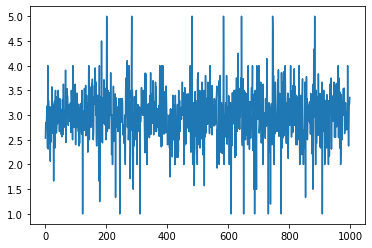

In [82]:
plt.plot(df3["mean_strength"])

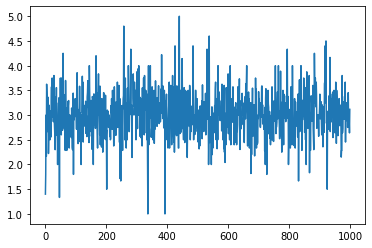

In [84]:
plt.plot(df3["mean_activity_after"])

# **How would you find users that are similar to each other based on the data attributes they have?¶**

# *Ans :        By using unique function on dataframe.user column we can figure out which user have same data or just by applying duplicate function we can do achieve the same result*